<a href="https://colab.research.google.com/github/ascle/colab_tcc2/blob/dev/4_analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando bibliotecas<hr style='border: 2px solid red;'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

### Conectando no ambiente que será utilizado <hr style='border: 2px solid red;'>

In [2]:
# Importando do Drive
from google.colab import drive
from os import chdir

drive.mount('/content/drive', force_remount=True)
chdir('/content/drive/MyDrive/UFS/tcc-2-ascle-ufs/bases/linkage_marco/')

Mounted at /content/drive


### Outras configurações <hr style='border: 2px solid red;'>



In [3]:
!pip install ipython-autotime

pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")
%load_ext autotime

SEED = 7
np.random.seed(SEED)

time: 603 µs (started: 2023-09-10 15:10:52 +00:00)


### Leitura dos dados <hr style='border: 2px solid red;'>

In [4]:
data_raw = pd.read_csv('dn_etl.csv', sep=';', low_memory=False)
data_raw.sort_index(axis=1, inplace=True)

time: 532 ms (started: 2023-09-10 15:10:52 +00:00)


In [5]:
data_raw.shape

(190020, 24)

time: 8.91 ms (started: 2023-09-10 15:10:53 +00:00)


In [6]:
data_raw.head()

,ANO,APGAR1,APGAR5,CODANOMAL_QTD,CONSPRENAT,ESCMAEETL_VALOR,ESTCIVMAE_COMPANHEIRO,GRAVIDEZ_VALOR,LOCNASC_DOMICILIO,LOCNASC_ESTAB_SAUDE,LOCNASC_HOSPITAL,LOCNASC_OUTROS,OBT_NEONATAL,PARTO_CESAREO,PARTO_VAGINALL,PESO,QTDFILMORT,QTDPARTCES,SEMAGESTAC,SEXO_FEM,SEXO_MASC,TPAPRESENT_CEFALICO,TPAPRESENT_PELVICO,TPAPRESENT_TRANSVERSA
0,2015,2.0,4.0,0.0,5.0,1,0,1,0,0,1,0,0,1,0,820.0,1.0,NaN,26.0,0,1,1,0,0
1,2015,9.0,10.0,0.0,8.0,4,1,1,0,0,1,0,0,1,0,4200.0,1.0,NaN,39.0,0,1,1,0,0
2,2015,7.0,8.0,0.0,10.0,11,1,1,0,0,1,0,0,0,1,3700.0,0.0,0.0,40.0,1,0,1,0,0
3,2015,7.0,8.0,0.0,7.0,4,0,1,0,0,1,0,0,0,1,3550.0,1.0,0.0,37.0,0,1,1,0,0
4,2015,9.0,10.0,0.0,3.0,11,0,1,0,0,1,0,0,1,0,3800.0,0.0,NaN,39.0,1,0,1,0,0


time: 62.1 ms (started: 2023-09-10 15:10:53 +00:00)


### Separando a base de dados entre variáveis e target<hr style='border: 2px solid red;'>

In [7]:
X_raw = data_raw.drop(columns=['ANO', 'OBT_NEONATAL', 'QTDPARTCES'])
X_raw_categ = X_raw.drop(columns=['APGAR1', 'APGAR5', 'CODANOMAL_QTD', 'CONSPRENAT', 'ESCMAEETL_VALOR', 'PESO', 'QTDFILMORT', 'SEMAGESTAC'])
X_raw_quant = X_raw[['APGAR1', 'APGAR5', 'CODANOMAL_QTD', 'CONSPRENAT', 'ESCMAEETL_VALOR', 'PESO', 'QTDFILMORT',  'SEMAGESTAC']]
y_raw = data_raw['OBT_NEONATAL']

time: 27.1 ms (started: 2023-09-10 15:10:53 +00:00)


Base de treino normalizada

In [8]:
scaler = scaler = StandardScaler()
scaler.fit(X_raw_quant)
X_norm_quant = scaler.transform(X_raw_quant)
X_norm_quant = pd.DataFrame(data = X_norm_quant, columns = X_raw_quant.keys())

time: 50.3 ms (started: 2023-09-10 15:10:53 +00:00)


### Visualização das variáveis <hr style='border: 2px solid red;'>

Gráfico de violino

In [9]:
dados_plot = pd.concat([y_raw, X_norm_quant], axis = 1)
print(dados_plot.shape)
dados_plot = pd.melt(dados_plot, id_vars="OBT_NEONATAL", var_name="variáveis", value_name="valores")

(190020, 9)
time: 55.4 ms (started: 2023-09-10 15:10:53 +00:00)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'APGAR1'),
  Text(1, 0, 'APGAR5'),
  Text(2, 0, 'CODANOMAL_QTD'),
  Text(3, 0, 'CONSPRENAT'),
  Text(4, 0, 'ESCMAEETL_VALOR'),
  Text(5, 0, 'PESO'),
  Text(6, 0, 'QTDFILMORT'),
  Text(7, 0, 'SEMAGESTAC')])

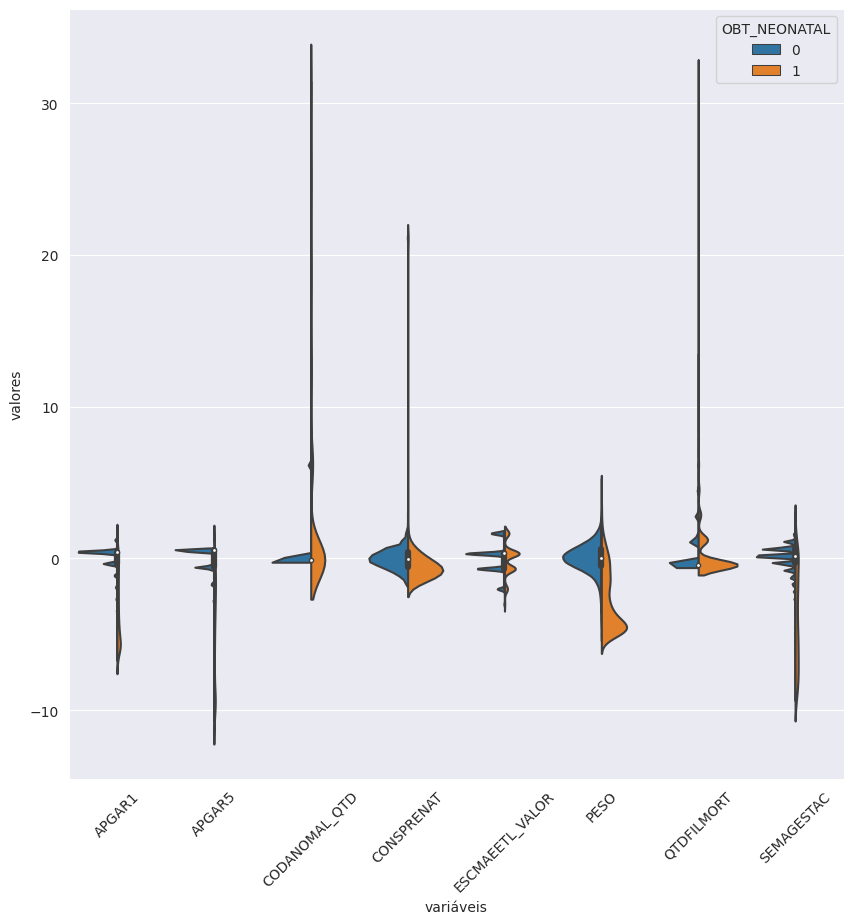

time: 5.46 s (started: 2023-09-10 15:10:53 +00:00)


In [10]:
plt.figure(figsize=(10,10))
sns.violinplot(x = "variáveis", y = "valores", hue = "OBT_NEONATAL", data = dados_plot, split=True)
plt.xticks(rotation = 45)

(377240, 9)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'APGAR1'),
  Text(1, 0, 'APGAR5'),
  Text(2, 0, 'CODANOMAL_QTD'),
  Text(3, 0, 'CONSPRENAT'),
  Text(4, 0, 'ESCMAEETL_VALOR'),
  Text(5, 0, 'PESO'),
  Text(6, 0, 'QTDFILMORT'),
  Text(7, 0, 'SEMAGESTAC')])

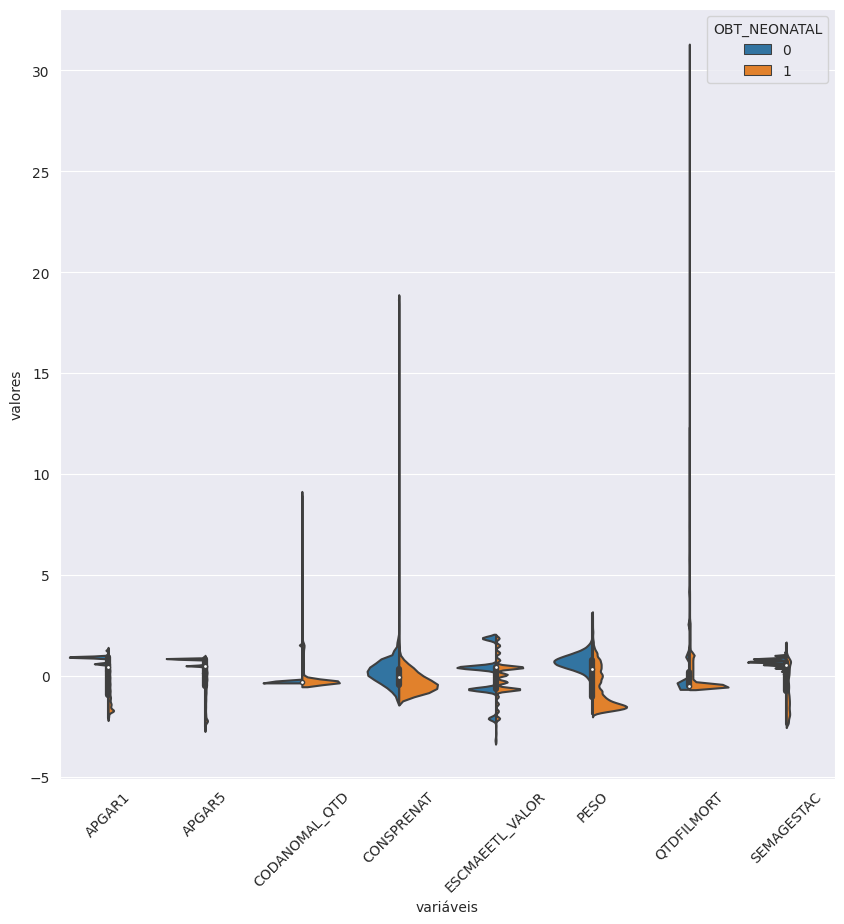

time: 12.4 s (started: 2023-09-10 15:10:59 +00:00)


In [11]:
from imblearn.over_sampling import SMOTE

# Balanceamento
smt = SMOTE(random_state=SEED)
X_bal_quant, y_bal = smt.fit_resample(X_raw_quant, y_raw)
dados_bal_plot = pd.concat([y_bal, X_bal_quant], axis=1)

# Normalizar os dados balanceados
scaler = StandardScaler()
scaler.fit(X_bal_quant)
X_bal_norm_quant = scaler.transform(X_bal_quant)
X_bal_norm_quant = pd.DataFrame(data = X_bal_norm_quant, columns = X_raw_quant.keys())
dados_bal_plot = pd.concat([y_bal, X_bal_norm_quant], axis = 1)

print(dados_bal_plot.shape)
dados_bal_plot = pd.melt(dados_bal_plot, id_vars="OBT_NEONATAL", var_name="variáveis", value_name="valores")

plt.figure(figsize=(10,10))
sns.violinplot(x = "variáveis", y = "valores", hue = "OBT_NEONATAL", data = dados_bal_plot, split=True)
plt.xticks(rotation = 45)

## Matriz de correlação

### Função que gera a matriz de correlação

In [12]:
def gerar_matriz_corr(corr):
  sns.set(style="white")

  # Generate a mask for the upper triangle
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True

  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(8, 6))

  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr, mask=mask, cmap=cmap, cbar_kws={"shrink": .5},
              square=True,
              #linewidths=.5, center=0, vmax=.3,
              annot = True, fmt = ".1f",)
  plt.xticks(rotation = 45)

time: 7.69 ms (started: 2023-09-10 15:11:11 +00:00)


<ipython-input-12-22aa10dc4733>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Figure size 640x480 with 0 Axes>

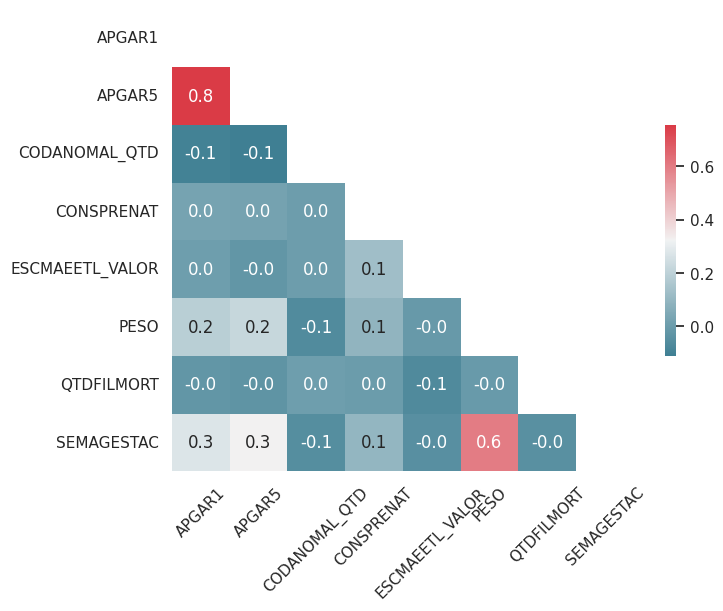

time: 855 ms (started: 2023-09-10 15:28:58 +00:00)


In [14]:
plt.clf()
matriz_correlacao = X_raw_quant.corr()
gerar_matriz_corr(matriz_correlacao)

## Visualizações do target <hr style='border: 2px solid red;'>

[Text(0.5, 1.0, 'Recém-nascido'),
 Text(0.5, 0, 'Óbito'),
 Text(0, 0.5, 'Percentual')]

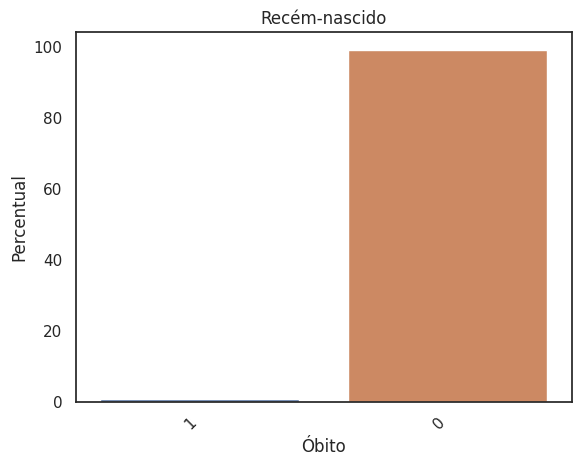

time: 603 ms (started: 2023-09-10 15:29:43 +00:00)


In [16]:
porc = (y_raw.value_counts(normalize=True)).round(3)*100
dados_plot = pd.DataFrame({'Percentual': porc}).sort_values('Percentual')
ax = sns.barplot(dados_plot.transpose())
plt.xticks(rotation=45, ha='right');
ax.set(title='Recém-nascido', xlabel='Óbito', ylabel='Percentual')

In [17]:
porc

0    99.3
1     0.7
Name: OBT_NEONATAL, dtype: float64

time: 5.53 ms (started: 2023-09-10 15:29:52 +00:00)
